<a href="https://colab.research.google.com/github/fzry18/-Asesmen-BNSP-Muhammad-Fazry-Suhada-Kompeten/blob/main/Assesment_BNSP_Muhammad_Fazry_Suhada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from IPython.display import Image, display, Markdown
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

In [ ]:
Image(url="https://www.datascience-pm.com/wp-content/uploads/2021/02/CRISP-DM.png", width=800, height=600)

Alur pengerjaan dalam analsis data ini menggunakan metode **CRISP-DM** seperti gambar diatas


- Business understanding – Kebutuhan Bisnis
- Data understanding – Data apa yang kita miliki / butuhkan? Apakah bersih?
- Data preparation – Bagaimana kita mengatur data untuk pemodelan?
- Modeling – Teknik Pemodelan apa yang digunakan
- Evaluation – Model mana yang paling sesuai dengan tujuan bisnis?
- Deployment – Bagaimana Stakeholder mengakses hasilnya?

# Business Understanding

## Latar Belakang
Dataset ini memberikan gambaran detail terkait reservasi hotel, mencakup informasi seperti ID pemesanan, jumlah tamu, durasi menginap, preferensi makanan, dan jenis kamar. Data ini sangat berguna bagi perhotelan untuk memahami pola reservasi, mengelola pemesanan dengan lebih efisien, menyesuaikan layanan, dan mengurangi risiko pembatalan, semuanya bertujuan untuk meningkatkan pengalaman tamu dan efisiensi operasional hotel.

## Tujuan
melakukan memprediksi status booking/reservasi hotel berdasarkan informasi yang ada, seperti jumlah tamu, durasi menginap, jenis rencana makanan, dan jenis kamar. Hal ini bertujuan untuk mengembangkan model prediktif yang dapat membantu hotel mengantisipasi kemungkinan pembatalan atau kelangsungan reservasi, memungkinkan perencanaan yang lebih efisien dan penyesuaian layanan untuk meningkatkan tingkat reservasi yang berhasil.

# Data Understanding

In [ ]:
link = 'https://raw.githubusercontent.com/arubhasy/dataset/main/Hotel_Reservations.csv'
df = pd.read_csv(link)
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2.0,0.0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2.0,0.0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1.0,0.0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2.0,0.0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2.0,0.0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
print("Total Jumlah Data : ",len(df))

Total Jumlah Data :  36275


In [ ]:
def check_duplicates(df):
    duplicate_rows = df[df.duplicated()]

    if not duplicate_rows.empty:
        print("Total duplicate rows:", len(duplicate_rows))
        for column in df.columns:
            print(f"Number of duplicates in {column}: {df[column].duplicated().sum()}")
    else:
        print("No duplicates found!")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36272 non-null  float64
 2   no_of_children                        36270 non-null  float64
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
categorical  =list(df.select_dtypes(include = ['object']).columns)
print("Kolom Kategorikal")
display(categorical)
numerical  =list(df.select_dtypes(include = ['number']).columns)
print("\nKolom Numerik")
display(numerical)

Kolom Kategorikal


['Booking_ID',
 'type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']


Kolom Numerik


['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [ ]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36272.000000,36270.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.847182,0.105294,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.568874,0.402674,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,30.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
print(df.describe())

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36272.000000    36270.000000          36275.000000       36275.000000   
mean       1.847182        0.105294              0.810724           2.204300   
std        0.568874        0.402674              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max       30.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.173281     8

## EDA

<ipython-input-1148-1ea010c7fde1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr().round(2)


<Axes: >

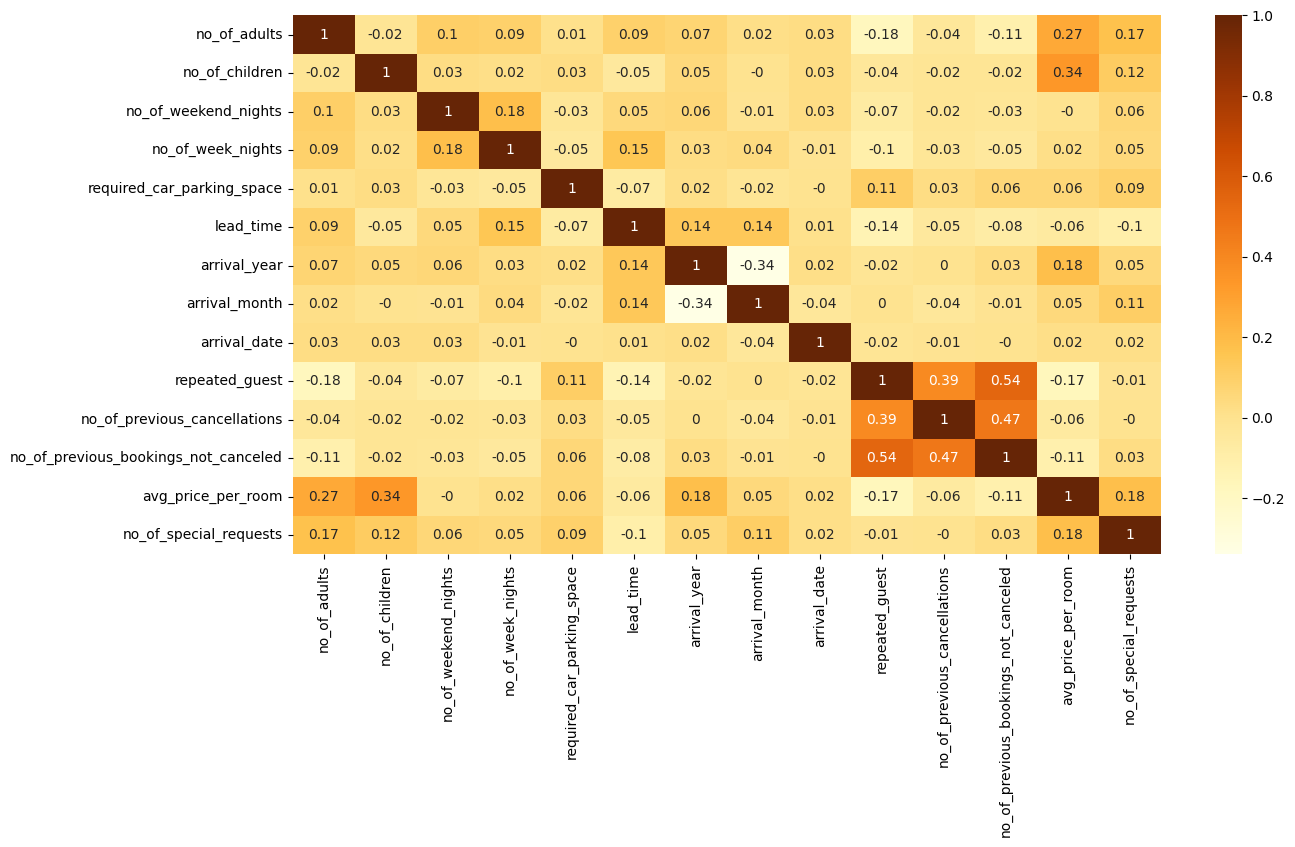

In [ ]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

Dari grafik korelasi diatas, dapat dilihat bahwa setiap data tidak memiliki korelasi yang kuat.

<Axes: title={'center': 'Variable arrival_year'}, xlabel='arrival_year', ylabel='count'>

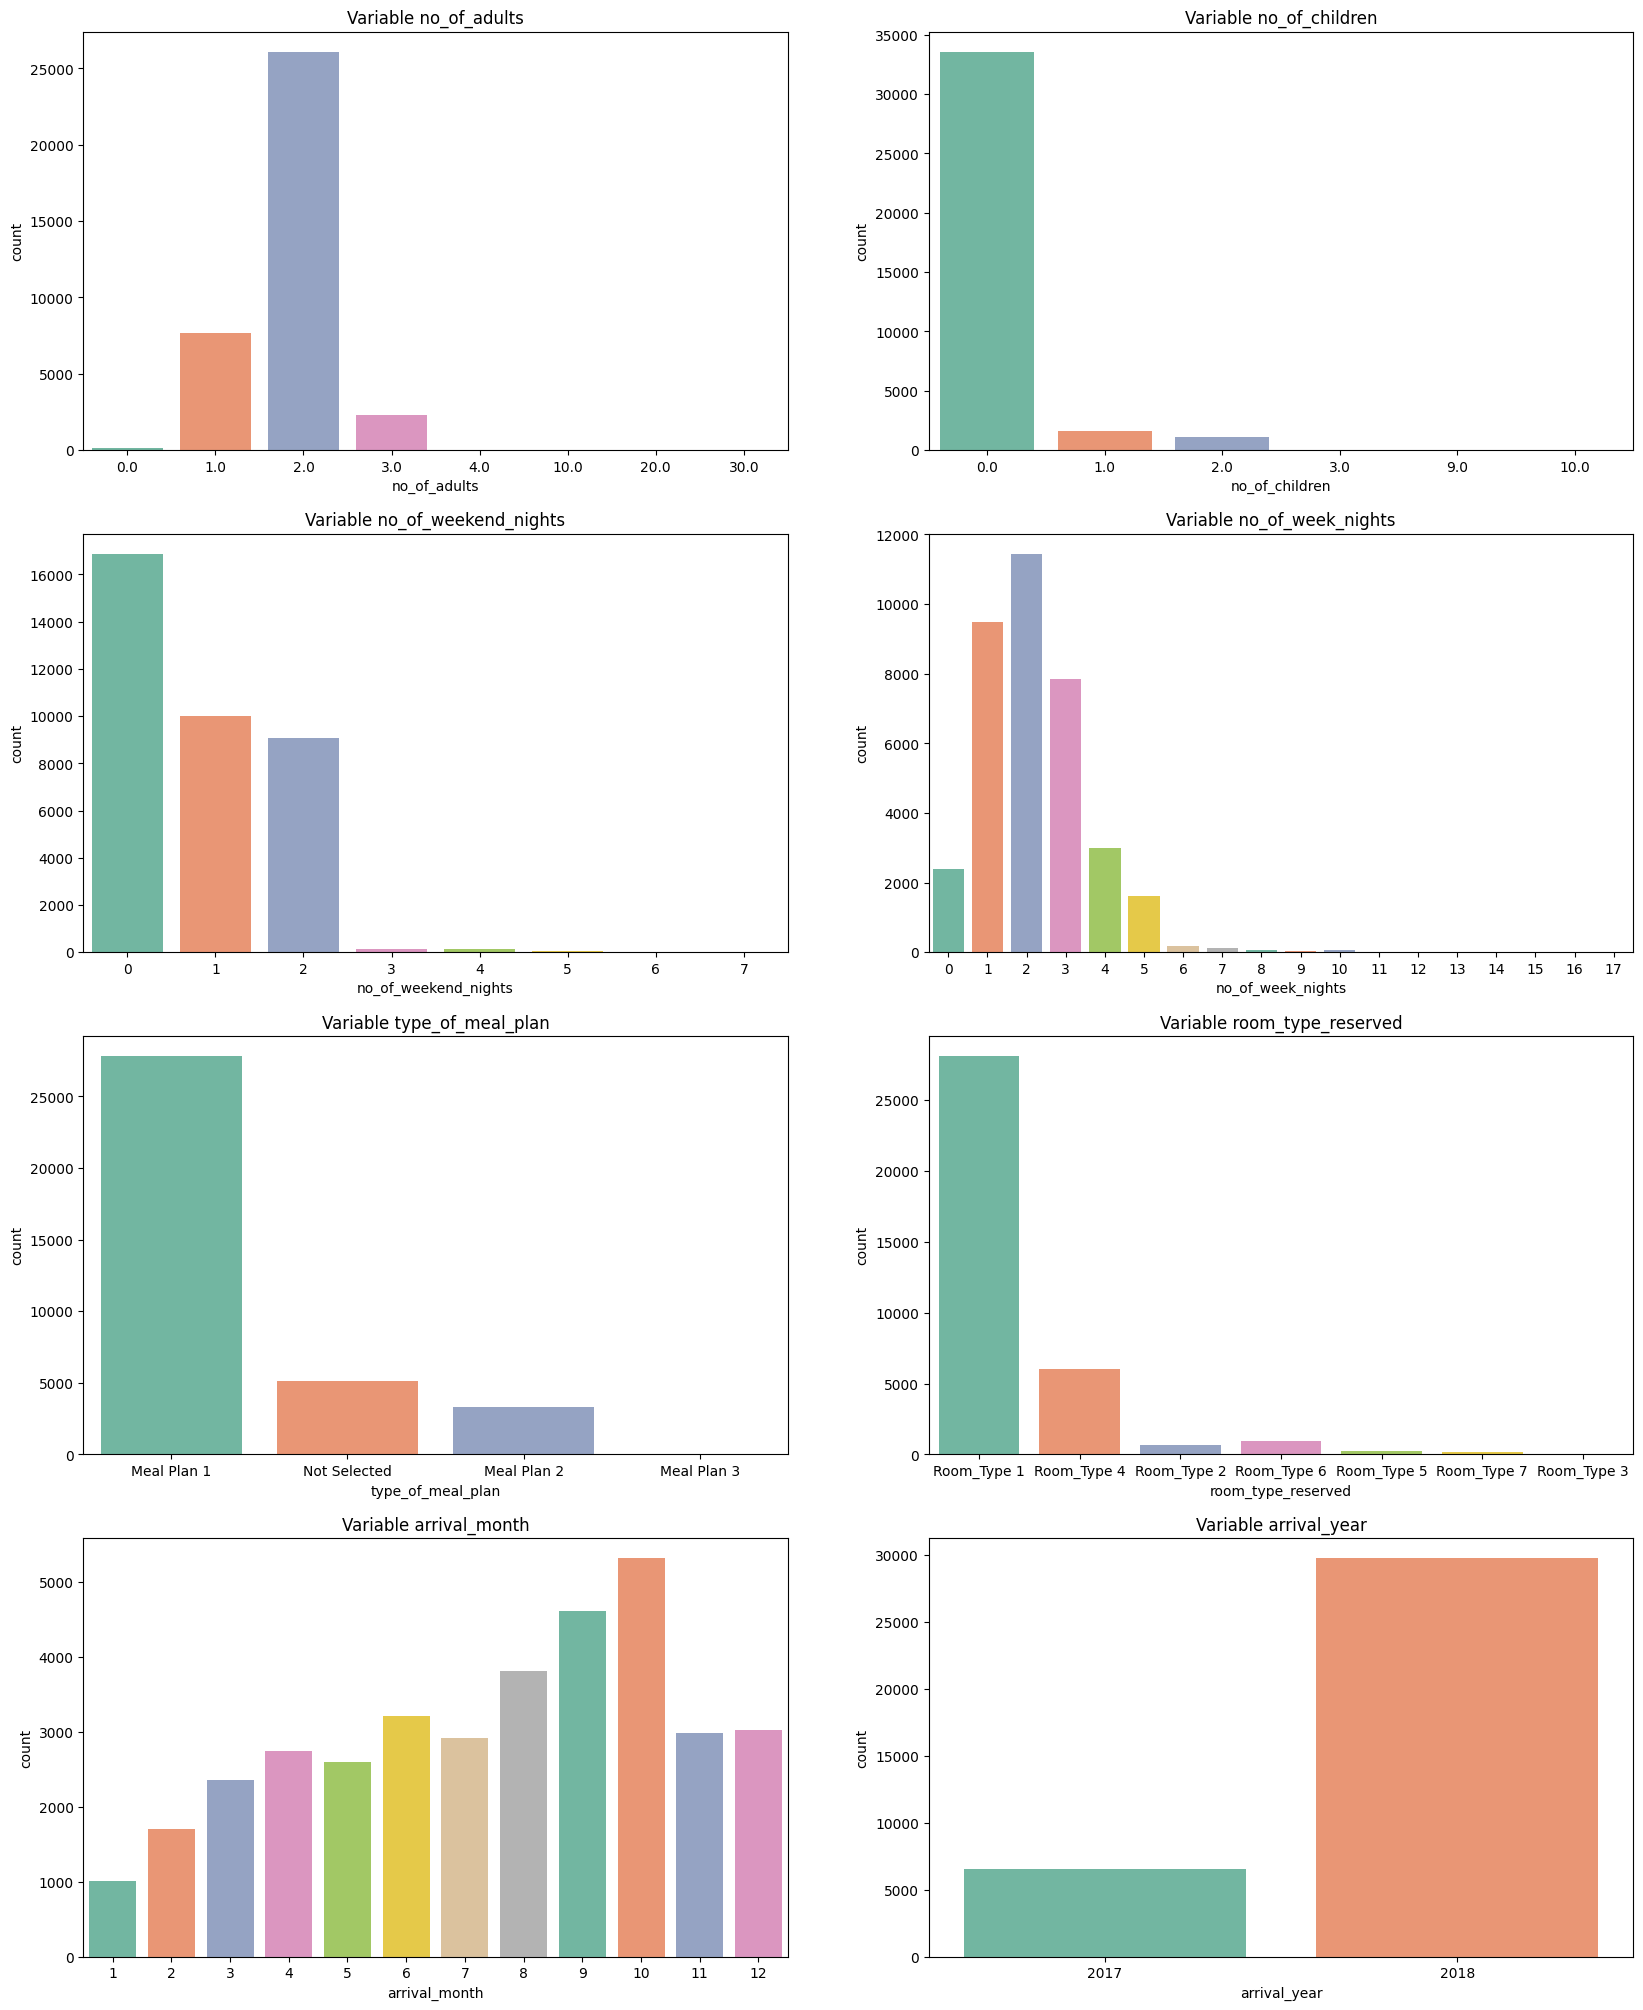

In [ ]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Variable no_of_adults')
sns.countplot(x = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(4,2,2)
plt.gca().set_title('Variable no_of_children')
sns.countplot(x = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(4,2,3)
plt.gca().set_title('Variable no_of_weekend_nights')
sns.countplot(x = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(4,2,4)
plt.gca().set_title('Variable no_of_week_nights')
sns.countplot(x = 'no_of_week_nights', palette = 'Set2', data = df)

plt.subplot(4,2,5)
plt.gca().set_title('Variable type_of_meal_plan')
sns.countplot(x = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(4,2,6)
plt.gca().set_title('Variable room_type_reserved')
sns.countplot(x = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(4,2,7)
plt.gca().set_title('Variable arrival_month')
sns.countplot(x = 'arrival_month', palette = 'Set2', data = df)

plt.subplot(4,2,8)
plt.gca().set_title('Variable arrival_year')
sns.countplot(x = 'arrival_year', palette = 'Set2', data = df)

Melihat variabel kategorikal ini,  dapat dilihat bahwa sebagian besar reservasi dibuat untuk kamar dengan dua orang dewasa, tanpa anak-anak, umumnya reservasi untuk jangka pendek, tidak banyak kasus untuk jangka panjang, sebagian besar reservasi memilih meal_plan_1, tidak membutuhkan tempat mobil, tipe kamar yang paling banyak dipesan adalah tipe 1 dan 4, dan sebagian besar data kami adalah reservasi tahun 2018.

<Axes: title={'center': 'Variable booking_status'}, xlabel='booking_status', ylabel='count'>

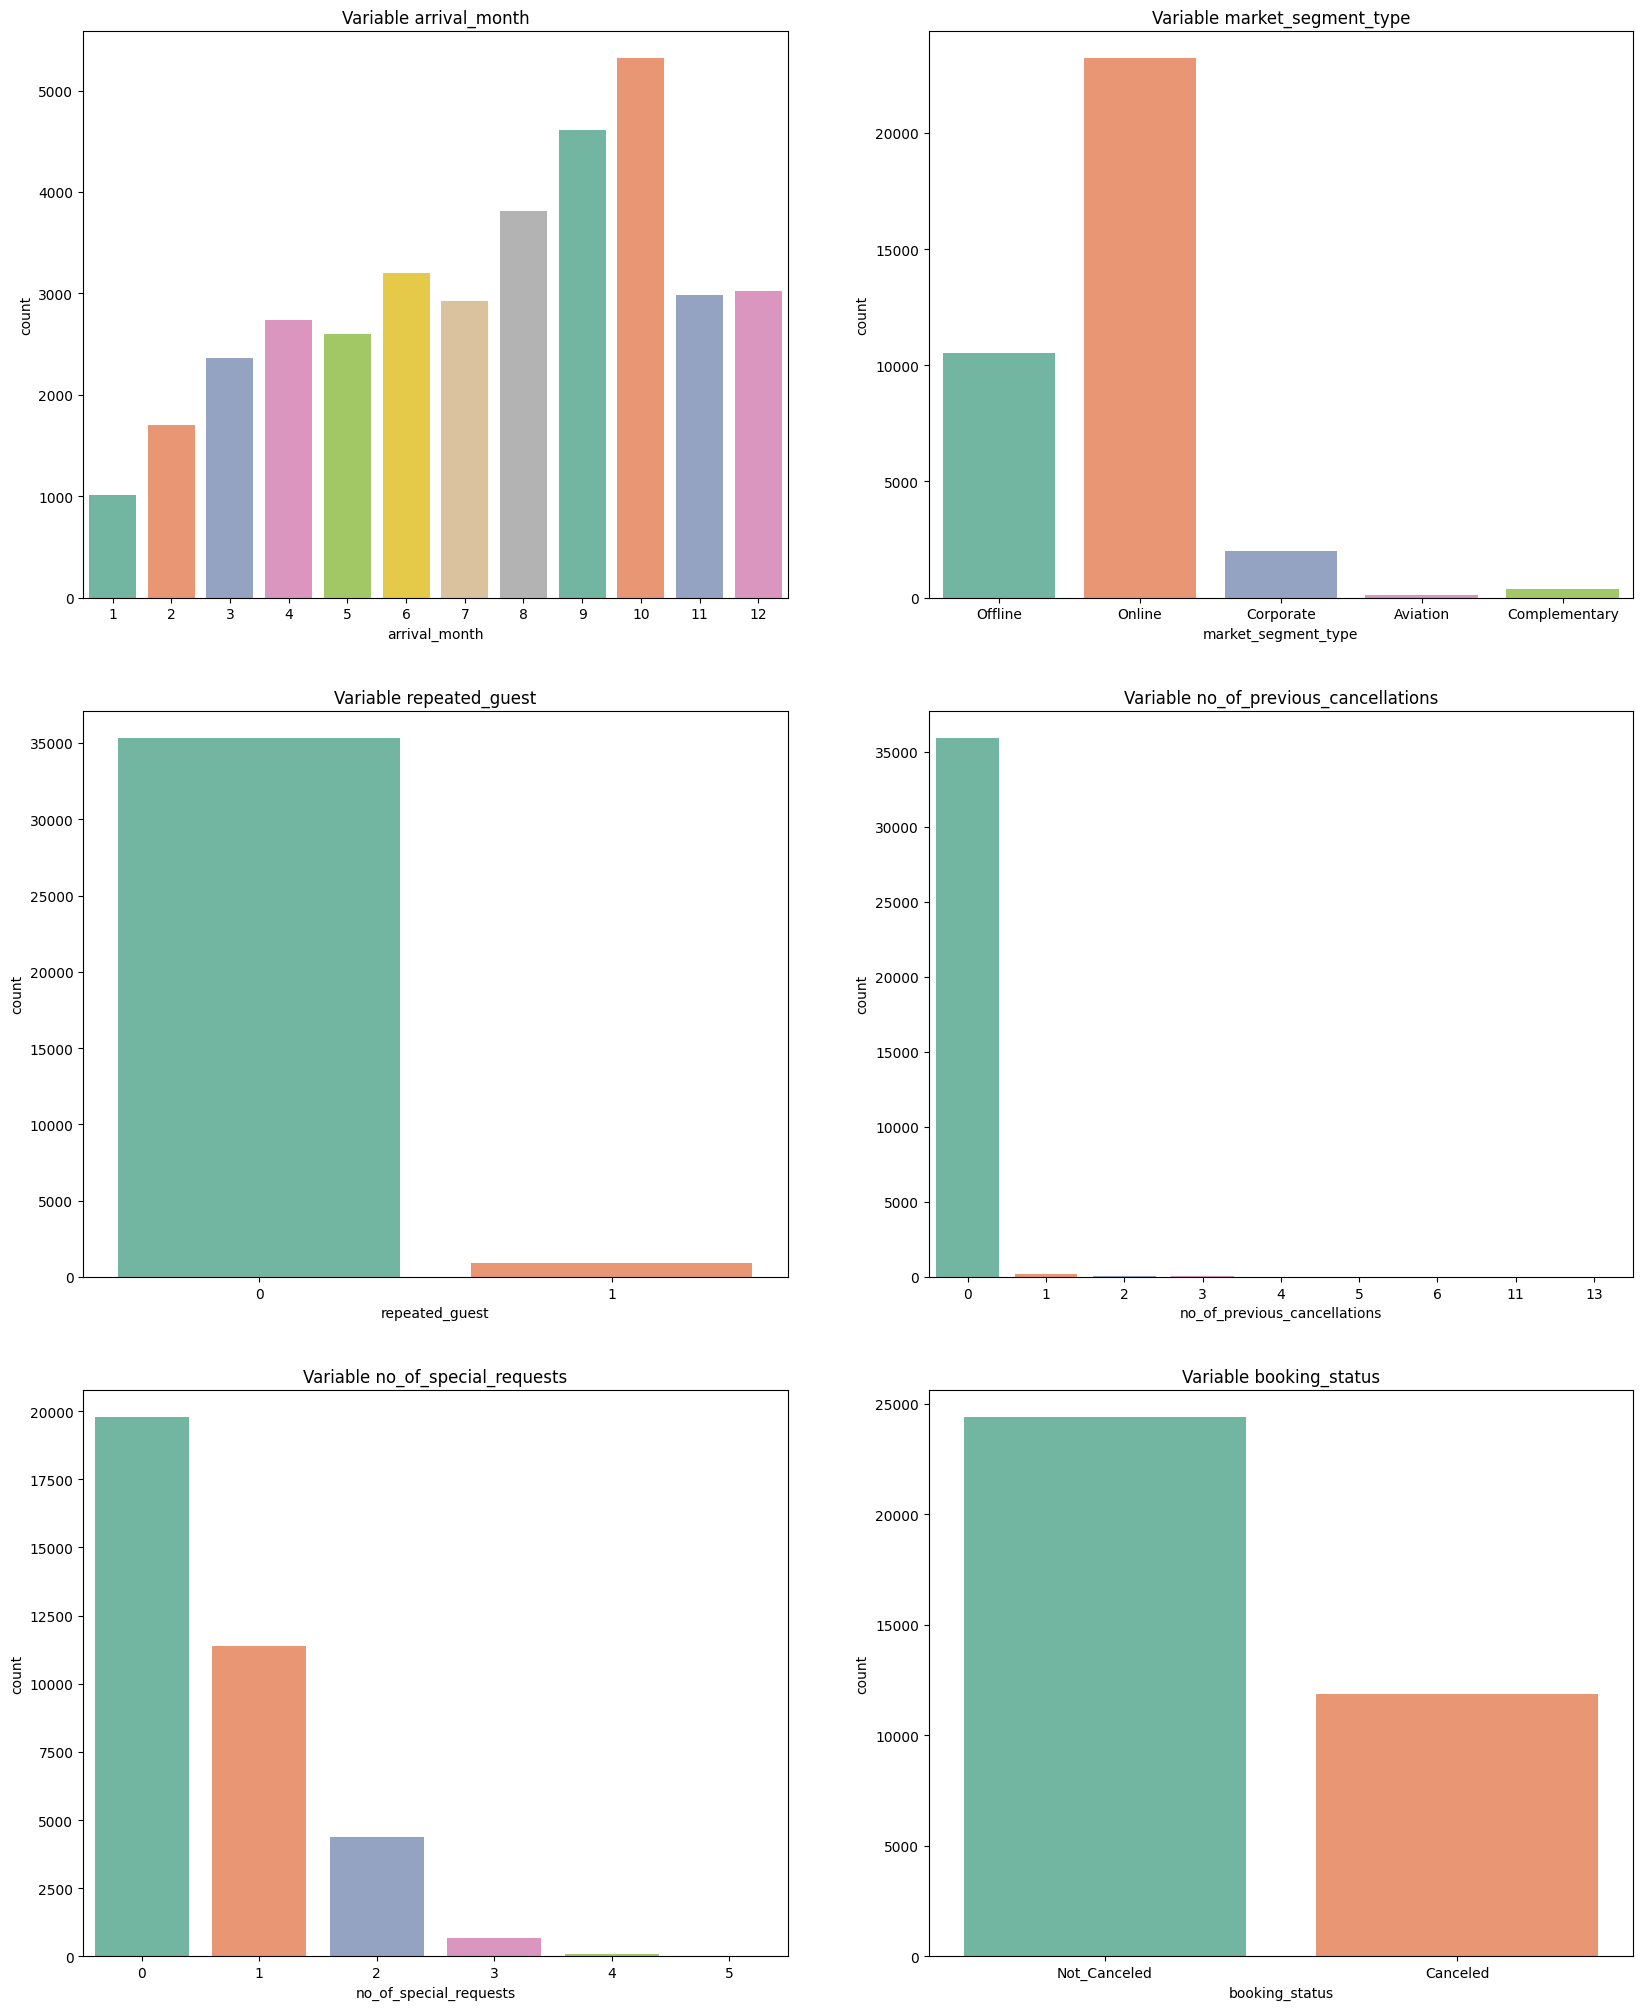

In [ ]:
plt.figure(figsize = (20,25))

plt.subplot(3,2,1)
plt.gca().set_title('Variable arrival_month')
sns.countplot(x = 'arrival_month', palette = 'Set2', data = df)

plt.subplot(3,2,2)
plt.gca().set_title('Variable market_segment_type')
sns.countplot(x = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(3,2,3)
plt.gca().set_title('Variable repeated_guest')
sns.countplot(x = 'repeated_guest', palette = 'Set2', data = df)

plt.subplot(3,2,4)
plt.gca().set_title('Variable no_of_previous_cancellations')
sns.countplot(x = 'no_of_previous_cancellations', palette = 'Set2', data = df)

plt.subplot(3,2,5)
plt.gca().set_title('Variable no_of_special_requests')
sns.countplot(x = 'no_of_special_requests', palette = 'Set2', data = df)

plt.subplot(3,2,6)
plt.gca().set_title('Variable booking_status')
sns.countplot(x = 'booking_status', palette = 'Set2', data = df)

Ketika dilihat pemesanan berdasarkan bulan, dapat dilihat bahwa ada peningkatan, dari Januari hingga Oktober jumlah pemesanan secara bertahap tumbuh dan turun lagi di bulan November dan Desember, sebagian besar pemesanan dilakukan secara online, sebagian besar tamu adalah tamu yang belum pernah ke hotel dan biasanya tamu yang tidak pernah membatalkan, semakin besar jumlah permintaan khusus, semakin sedikit data yang  dimiliki,Ini menunjukkan bahwa ketika tamu mengajukan permintaan khusus, data yang tersedia untuk analisis menjadi lebih terbatas. Ketika melihat variabel target, dapat dilihat bahwa status booking memiliki sekitar lebih dari 65% reservasi yang belum dibatalkan.

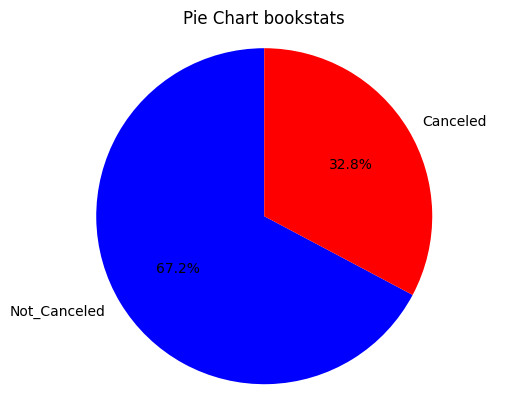

In [ ]:
booking_status = df['booking_status'].value_counts()
labels = booking_status.index
sizes = booking_status.values
colors = ['blue', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Agar pie chart terlihat bulat
plt.title('Pie Chart bookstats')
plt.show()

# Data Processing

In [ ]:
# Hitung jumlah nilai yang hilang untuk setiap fitur
missing_values = df.isnull().sum()

# Menyaring fitur-fitur tanpa nilai yang hilang
missing_values = missing_values[missing_values > 0]

# Menampilkan nilai yang hilang
if not missing_values.empty:
    print("Number of missing values for each feature:")
    print(missing_values)
else:
    print("No missing values detected in the dataset!")

Number of missing values for each feature:
no_of_adults           3
no_of_children         5
market_segment_type    4
dtype: int64


In [ ]:
missing_value_percentage = pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Percentage'])
missing_value_percentage

,Percentage
Booking_ID,0.000000
no_of_adults,0.008270
no_of_children,0.013784
no_of_weekend_nights,0.000000
no_of_week_nights,0.000000
type_of_meal_plan,0.000000
required_car_parking_space,0.000000
room_type_reserved,0.000000
lead_time,0.000000
arrival_year,0.000000


Karena persentasenya rendah maka saya hapus saja

In [ ]:
# Hapus Missing Value
df.dropna(inplace=True)

In [ ]:
# mengecek apakah ada yang duplikat dari data yang ada
check_duplicates(df)

No duplicates found!


In [ ]:
# Calculate the number of missing values for each feature
missing_values = df.isnull().sum()

# Filter out features without missing values
missing_values = missing_values[missing_values > 0]

# Display missing values
if not missing_values.empty:
    print("Number of missing values for each feature:")
    print(missing_values)
else:
    print("No missing values detected in the dataset!")

No missing values detected in the dataset!


Mencari Outlier dengan metode IQR

IQR atau Interquartile Range adalah ukuran statistik yang mengukur sebaran data dalam sebuah distribusi. IQR dihitung sebagai perbedaan antara kuartil pertama (Q1) dan kuartil ketiga (Q3) dalam rangkaian data, yang mencakup 50% data terpusat di sekitar nilai-nilai ini.

Langkah-langkah untuk menghitung IQR:
1. **Kuartil Pertama (Q1)**: Merupakan nilai tengah antara nilai terkecil (minimum) dan nilai median pada setengah bagian pertama dari data.
2. **Kuartil Ketiga (Q3)**: Merupakan nilai tengah antara nilai median dan nilai terbesar (maksimum) pada setengah bagian kedua dari data.
3. **IQR (Interquartile Range)**: Selisih antara Q3 dan Q1 (IQR = Q3 - Q1).

IQR sering digunakan dalam analisis statistik untuk mengukur sebaran data serta untuk mengidentifikasi nilai-nilai ekstrem atau outlier dalam dataset. Pendekatan umum untuk mengidentifikasi outlier adalah dengan menggunakan batas atas (Q3 + 1.5 * IQR) dan batas bawah (Q1 - 1.5 * IQR). Nilai-nilai di luar batas ini sering kali dianggap sebagai outlier atau nilai yang ekstrem dalam distribusi data.

In [ ]:
# Menghitung Q1, Q3, dan IQR
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Mengidentifikasi nilai-nilai outlier
outliers = df.select_dtypes(include=[np.number]).apply(lambda x: ((x < (Q1[x.name] - 1.5 * IQR[x.name])) | (x > (Q3[x.name] + 1.5 * IQR[x.name]))).sum()).sum()

print(f"Jumlah data yang dianggap sebagai outlier: {outliers}")

Jumlah data yang dianggap sebagai outlier: 26707


Kesimpulan dari kodingan ini adalah bahwa terdapat 26,707 data yang diidentifikasi sebagai outlier berdasarkan perhitungan IQR pada seluruh kolom numerik dalam dataset Hotel Reservation.

In [ ]:
# Fungsi untuk menangani outlier dalam setiap kolom numerik
def handle_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti nilai outlier dengan batas atas dan batas bawah
    column = np.where(column < lower_bound, lower_bound, column)
    column = np.where(column > upper_bound, upper_bound, column)

    return column
# Memproses setiap kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    df[column] = handle_outliers(df[column])


In [ ]:
# Mengonversi kolom numerik ke tipe data integer setelah penanganan outlier
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].astype(int)


In [ ]:
# # Cek tipe data setelah penanganan outlier
# print(df.dtypes)

In [ ]:
# # Mengecek kolom yang memiliki NaN
# columns_with_nan = df.columns[df.isna().any()].tolist()
# print(columns_with_nan)

In [ ]:
# # Menampilkan jumlah NaN dalam setiap kolom
# nan_count_per_column = df.isna().sum()
# print(nan_count_per_column)

In [ ]:
# Menghitung Q1, Q3, dan IQR
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Mengidentifikasi nilai-nilai outlier
outliers = df.select_dtypes(include=[np.number]).apply(lambda x: ((x < (Q1[x.name] - 1.5 * IQR[x.name])) | (x > (Q3[x.name] + 1.5 * IQR[x.name]))).sum()).sum()

print(f"Jumlah data yang dianggap sebagai outlier: {outliers}")

Jumlah data yang dianggap sebagai outlier: 0


In [ ]:
# Memindahkan kolom booking_status menjadi variabel numerik menggunakan one-hot encoding
Book_status=pd.get_dummies(df['booking_status'],drop_first=True)

In [ ]:
# Mengubah nama kolom Book_status menjadi status
Book_status.columns=['Status']

In [ ]:
# Menggabungkan DataFrame Book_status dengan DataFrame df(dataset hotel reservation)
df = pd.concat([Book_status, df], axis=1)

In [ ]:
df.head(5)

,Status,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2018,10,2,Offline,0,0,0,65,0,Not_Canceled
1,1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106,1,Not_Canceled
2,0,INN00003,2,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60,0,Canceled
3,0,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100,0,Canceled
4,0,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94,0,Canceled


In [ ]:
# Menghapus kolom yang tidak penting
df.drop('Booking_ID',axis=1,inplace=True)

In [ ]:
df.drop(['type_of_meal_plan','room_type_reserved','market_segment_type'],axis=1,inplace=True)
df.drop('booking_status',axis=1,inplace=True)

In [ ]:
# Memisahkan data fitur dan target
X=df.drop('Status',axis=1)
y=df['Status']
# Membagi data menjadi data latih dan data uji dengan perbandingan 67:33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print('Jumlah Data Train : ',len(X_train))
print('Jumlah Data Test : ',len(X_test))

Jumlah Data Train :  24296
Jumlah Data Test :  11967


In [ ]:
  # Scaling menggunakan StandardScaler
scaler=StandardScaler()
scaler.fit(X_train,y_train)

StandardScaler()

In [ ]:
# Melakukan scaling pada data latih menggunakan scaler yang telah difit sebelumnya
X_train = scaler.transform(X_train)

# Melakukan scaling pada data uji menggunakan scaler yang telah difit sebelumnya
X_test = scaler.transform(X_test)

# Modelling

In [ ]:
# Decision Tree
Hotel_DT=DecisionTreeClassifier()
Hotel_DT.fit(X_train,y_train)

# Random Forest
Hotel_RF=RandomForestClassifier()
Hotel_RF.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
def display_model(image_url, title):
    image = Image(url=image_url, width=900, height=450)
    display(Markdown(f"### {title}"))
    display(image)

# Daftar model dan URL gambar
models = [
    ("https://softscients.com/wp-content/uploads/2020/05/1.-Decision-Tree.png", "Algoritma Decision Tree"),
    ("https://miro.medium.com/v2/resize:fit:1400/1*ZFuMI_HrI3jt2Wlay73IUQ.png", "Algoritma Random Forest")
]

# Tampilkan gambar dan judul dengan fungsi display_model
for model_url, model_title in models:
    display_model(model_url, model_title)

### Algoritma Decision Tree

### Algoritma Random Forest

# Evalution

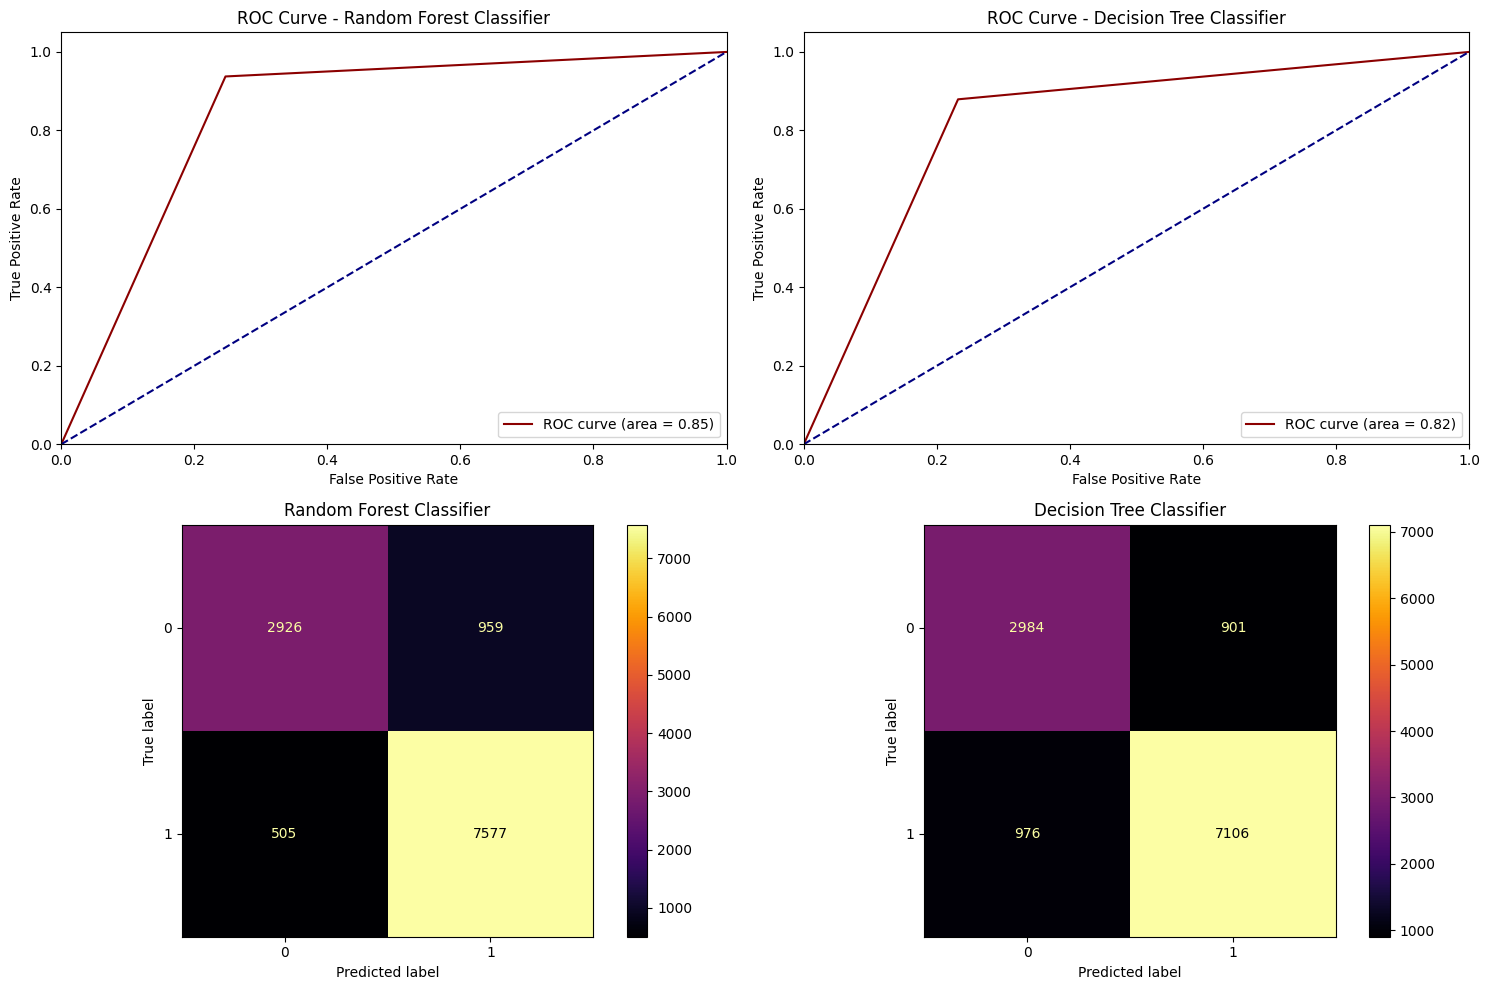

,Accuracy (%),Precision (%),Recall (%),ROC-AUC (%),F1-Score (%)
Model,,,,,
Random Forest Classifier,87.766357,88.765230,93.751547,84.533431,91.190276
Decision Tree Classifier,84.315200,88.747346,87.923781,82.366009,88.333644


In [ ]:
# Melakukan prediksi menggunakan model Random Forest (Hotel_RF) pada data uji (X_test)
y_pred_RF = Hotel_RF.predict(X_test)

# Melakukan prediksi menggunakan model Decision Tree (Hotel_DT) pada data uji (X_test)
y_pred_DT = Hotel_DT.predict(X_test)

# List model dan nama model untuk evaluasi
models = [Hotel_RF, Hotel_DT]
model_names = ['Random Forest Classifier', 'Decision Tree Classifier']

# Inisialisasi list untuk menyimpan hasil evaluasi
acc_scores = []
pre_scores = []
rec_scores = []
roc_scores = []
f1_scores = []

# Buat figure dan axes untuk menampilkan visualisasi
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Loop untuk setiap model
for i, model in enumerate(models):
    # Prediksi target variabel pada data uji
    y_pred = model.predict(X_test)

    # Hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Hitung nilai roc-auc
    roc = roc_auc_score(y_test, y_pred)

    # Hitung false positive rate (fpr) dan true positive rate (tpr) untuk kurva roc
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    # Tampilkan kurva roc
    roc_display = axes[0, i].plot(fpr, tpr, color='darkred', label='ROC curve (area = %0.2f)' % roc)
    roc_display = axes[0, i].plot([0, 1], [0, 1], color='navy', linestyle='--')
    roc_display = axes[0, i].set_xlim([0.0, 1.0])
    roc_display = axes[0, i].set_ylim([0.0, 1.05])
    roc_display = axes[0, i].set_xlabel('False Positive Rate')
    roc_display = axes[0, i].set_ylabel('True Positive Rate')
    roc_display = axes[0, i].set_title('ROC Curve - ' + model_names[i])
    roc_display = axes[0, i].legend(loc="lower right")

    # Tampilkan confusion matrix
    cm_display = ConfusionMatrixDisplay(cm).plot(ax=axes[1, i], cmap='inferno')
    cm_display.ax_.set_title(model_names[i])

    # Hitung true negative, false positive, false negative, true positive
    tn, fp, fn, tp = cm.ravel()

    # Hitung akurasi, precision, recall, dan f1-score
    ac = (tp + tn) / (tp + fp + fn + tn)
    pr = tp / (tp + fp)
    rc = tp / (tp + fn)
    f1 = (2 * pr * rc) / (pr + rc)

    # Simpan hasil evaluasi pada list
    acc_scores.append(ac * 100)
    pre_scores.append(pr * 100)
    rec_scores.append(rc * 100)
    roc_scores.append(roc * 100)
    f1_scores.append(f1 * 100)

# Tampilkan visualisasi
plt.tight_layout()
plt.show()

# Buat dataframe dari hasil evaluasi
df_eval = pd.DataFrame({'Model': model_names,
                        'Accuracy (%)': acc_scores,
                        'Precision (%)': pre_scores,
                        'Recall (%)': rec_scores,
                        'ROC-AUC (%)': roc_scores,
                        'F1-Score (%)': f1_scores})

# Set index dataframe menjadi nama model
df_eval = df_eval.set_index('Model')

# Tampilkan dataframe dengan style untuk highlight nilai tertinggi
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

df_eval_styled = df_eval.style.apply(highlight_max, axis=0)
df_eval_styled

In [ ]:
# Fitur penting dari Random Forest
rf_feature_importances = Hotel_RF.feature_importances_

# Fitur penting dari Decision Tree
dt_feature_importances = Hotel_DT.feature_importances_

# Membuat DataFrame untuk menampilkan fitur penting dari kedua model
df_feature_importance = pd.DataFrame({
    'Feature': X.columns,  # Ganti X_train.columns dengan nama kolom fitur Anda
    'Random Forest Importance': rf_feature_importances,
    'Decision Tree Importance': dt_feature_importances
})

# Mengurutkan DataFrame berdasarkan fitur penting dari Random Forest
df_feature_importance = df_feature_importance.sort_values(by='Random Forest Importance', ascending=False)

# Menampilkan DataFrame fitur penting dengan style untuk highlight nilai tertinggi
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

df_feature_importance_styled = df_feature_importance.style.apply(highlight_max, subset=['Random Forest Importance', 'Decision Tree Importance'])
df_feature_importance_styled


,Feature,Random Forest Importance,Decision Tree Importance
5,lead_time,0.372826,0.385427
12,avg_price_per_room,0.223108,0.216161
8,arrival_date,0.127201,0.124797
7,arrival_month,0.102903,0.103892
13,no_of_special_requests,0.078239,0.061917
3,no_of_week_nights,0.055655,0.060869
2,no_of_weekend_nights,0.040068,0.046936
0,no_of_adults,0.000000,0.000000
1,no_of_children,0.000000,0.000000
4,required_car_parking_space,0.000000,0.000000


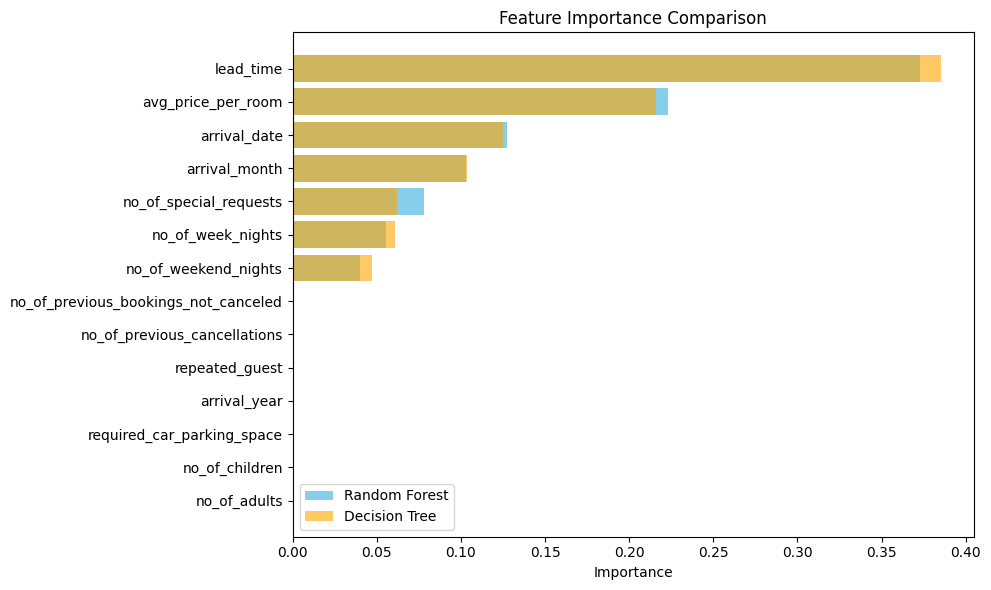

In [ ]:
# Mendapatkan DataFrame fitur penting yang sudah diurutkan
df_feature_importance = df_feature_importance.sort_values(by='Random Forest Importance', ascending=True)

# Plotting bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance['Feature'], df_feature_importance['Random Forest Importance'], color='skyblue', label='Random Forest')
plt.barh(df_feature_importance['Feature'], df_feature_importance['Decision Tree Importance'], color='orange', alpha=0.6, label='Decision Tree')

plt.xlabel('Importance')
plt.title('Feature Importance Comparison')
plt.legend()
plt.tight_layout()
plt.show()

# Data Latih dan Data test dengan perbandingan 80:20

In [ ]:
# Memisahkan data fitur dan target
X=df.drop('Status',axis=1)
y=df['Status']
# Membagi data menjadi data latih dan data uji dengan perbandingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
  # Scaling menggunakan StandardScaler
scaler=StandardScaler()
scaler.fit(X_train,y_train)

StandardScaler()

In [ ]:
# Melakukan scaling pada data latih menggunakan scaler yang telah difit sebelumnya
X_train = scaler.transform(X_train)

# Melakukan scaling pada data uji menggunakan scaler yang telah difit sebelumnya
X_test = scaler.transform(X_test)

In [ ]:
# Decision Tree
Hotel_DT=DecisionTreeClassifier()
Hotel_DT.fit(X_train,y_train)

# Random Forest
Hotel_RF=RandomForestClassifier()
Hotel_RF.fit(X_train,y_train)

RandomForestClassifier()

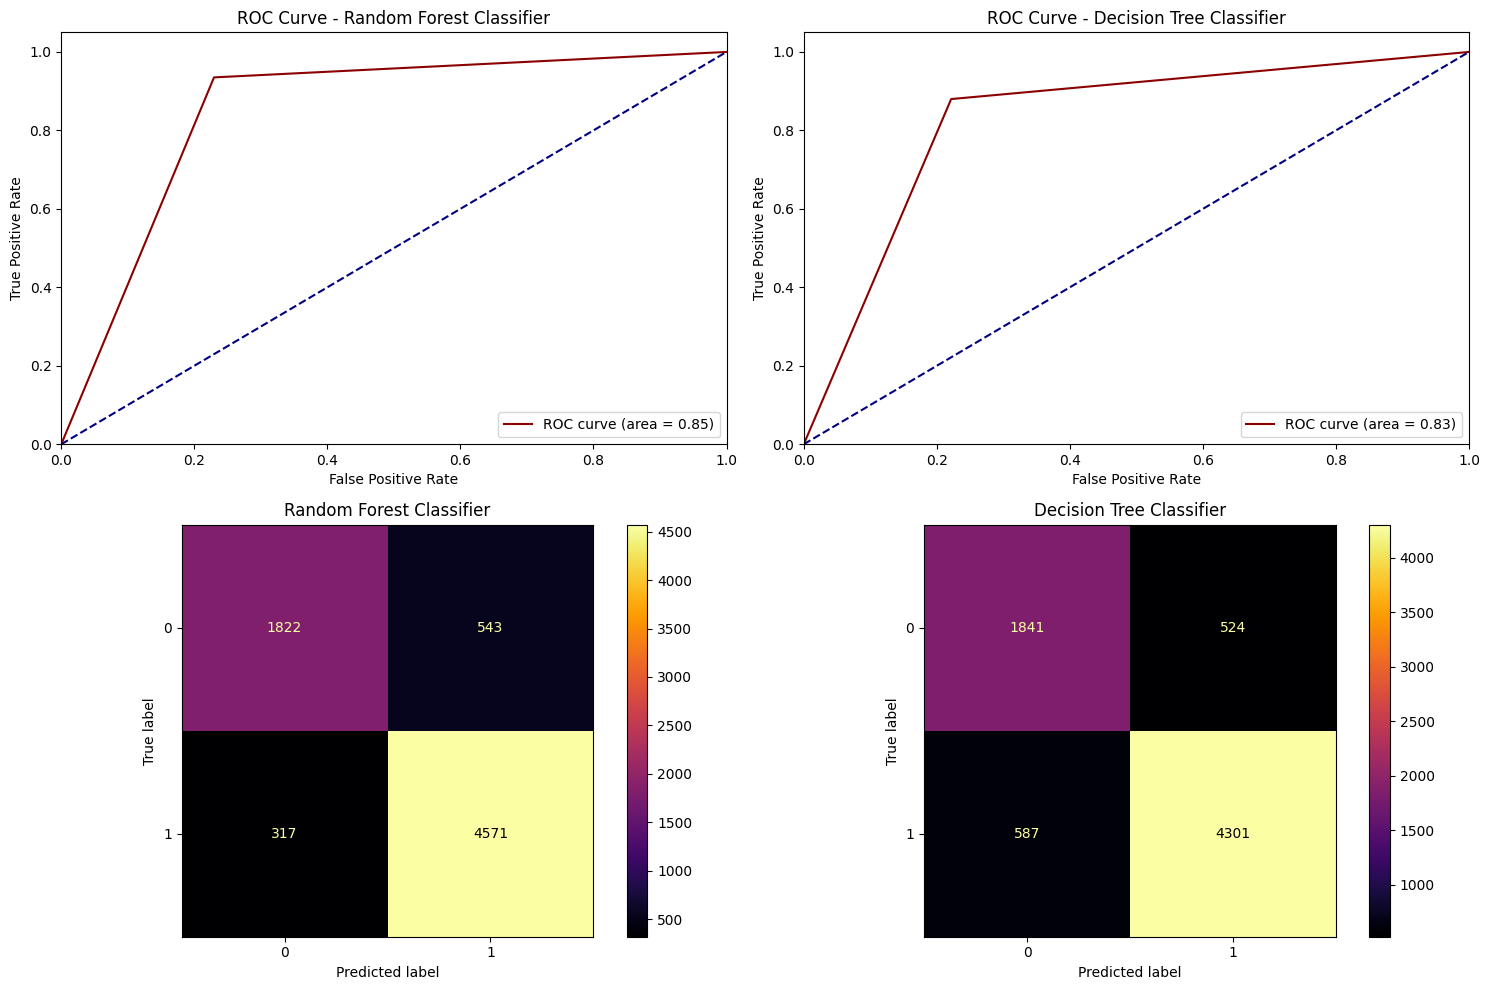

,Accuracy (%),Precision (%),Recall (%),ROC-AUC (%),F1-Score (%)
Model,,,,,
Random Forest Classifier,88.142837,89.382088,93.514730,85.277450,91.401720
Decision Tree Classifier,84.682200,89.139896,87.990998,82.917275,88.561721


In [ ]:
# Melakukan prediksi menggunakan model Random Forest (Hotel_RF) pada data uji (X_test)
y_pred_RF = Hotel_RF.predict(X_test)

# Melakukan prediksi menggunakan model Decision Tree (Hotel_DT) pada data uji (X_test)
y_pred_DT = Hotel_DT.predict(X_test)

# List model dan nama model untuk evaluasi
models = [Hotel_RF, Hotel_DT]
model_names = ['Random Forest Classifier', 'Decision Tree Classifier']

# Inisialisasi list untuk menyimpan hasil evaluasi
acc_scores = []
pre_scores = []
rec_scores = []
roc_scores = []
f1_scores = []

# Buat figure dan axes untuk menampilkan visualisasi
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Loop untuk setiap model
for i, model in enumerate(models):
    # Prediksi target variabel pada data uji
    y_pred = model.predict(X_test)

    # Hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Hitung nilai roc-auc
    roc = roc_auc_score(y_test, y_pred)

    # Hitung false positive rate (fpr) dan true positive rate (tpr) untuk kurva roc
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    # Tampilkan kurva roc
    roc_display = axes[0, i].plot(fpr, tpr, color='darkred', label='ROC curve (area = %0.2f)' % roc)
    roc_display = axes[0, i].plot([0, 1], [0, 1], color='navy', linestyle='--')
    roc_display = axes[0, i].set_xlim([0.0, 1.0])
    roc_display = axes[0, i].set_ylim([0.0, 1.05])
    roc_display = axes[0, i].set_xlabel('False Positive Rate')
    roc_display = axes[0, i].set_ylabel('True Positive Rate')
    roc_display = axes[0, i].set_title('ROC Curve - ' + model_names[i])
    roc_display = axes[0, i].legend(loc="lower right")

    # Tampilkan confusion matrix
    cm_display = ConfusionMatrixDisplay(cm).plot(ax=axes[1, i], cmap='inferno')
    cm_display.ax_.set_title(model_names[i])

    # Hitung true negative, false positive, false negative, true positive
    tn, fp, fn, tp = cm.ravel()

    # Hitung akurasi, precision, recall, dan f1-score
    ac = (tp + tn) / (tp + fp + fn + tn)
    pr = tp / (tp + fp)
    rc = tp / (tp + fn)
    f1 = (2 * pr * rc) / (pr + rc)

    # Simpan hasil evaluasi pada list
    acc_scores.append(ac * 100)
    pre_scores.append(pr * 100)
    rec_scores.append(rc * 100)
    roc_scores.append(roc * 100)
    f1_scores.append(f1 * 100)

# Tampilkan visualisasi
plt.tight_layout()
plt.show()

# Buat dataframe dari hasil evaluasi
df_eval = pd.DataFrame({'Model': model_names,
                        'Accuracy (%)': acc_scores,
                        'Precision (%)': pre_scores,
                        'Recall (%)': rec_scores,
                        'ROC-AUC (%)': roc_scores,
                        'F1-Score (%)': f1_scores})

# Set index dataframe menjadi nama model
df_eval = df_eval.set_index('Model')

# Tampilkan dataframe dengan style untuk highlight nilai tertinggi
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

df_eval_styled = df_eval.style.apply(highlight_max, axis=0)
df_eval_styled

In [ ]:
# Fitur penting dari Random Forest
rf_feature_importances = Hotel_RF.feature_importances_

# Fitur penting dari Decision Tree
dt_feature_importances = Hotel_DT.feature_importances_

# Membuat DataFrame untuk menampilkan fitur penting dari kedua model
df_feature_importance = pd.DataFrame({
    'Feature': X.columns,  # Ganti X_train.columns dengan nama kolom fitur Anda
    'Random Forest Importance': rf_feature_importances,
    'Decision Tree Importance': dt_feature_importances
})

# Mengurutkan DataFrame berdasarkan fitur penting dari Random Forest
df_feature_importance = df_feature_importance.sort_values(by='Random Forest Importance', ascending=False)

# Menampilkan DataFrame fitur penting dengan style untuk highlight nilai tertinggi
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

df_feature_importance_styled = df_feature_importance.style.apply(highlight_max, subset=['Random Forest Importance', 'Decision Tree Importance'])
df_feature_importance_styled


,Feature,Random Forest Importance,Decision Tree Importance
5,lead_time,0.373708,0.384517
12,avg_price_per_room,0.223778,0.218637
8,arrival_date,0.126435,0.120931
7,arrival_month,0.102180,0.106126
13,no_of_special_requests,0.081066,0.062250
3,no_of_week_nights,0.055119,0.056985
2,no_of_weekend_nights,0.037714,0.050555
0,no_of_adults,0.000000,0.000000
1,no_of_children,0.000000,0.000000
4,required_car_parking_space,0.000000,0.000000


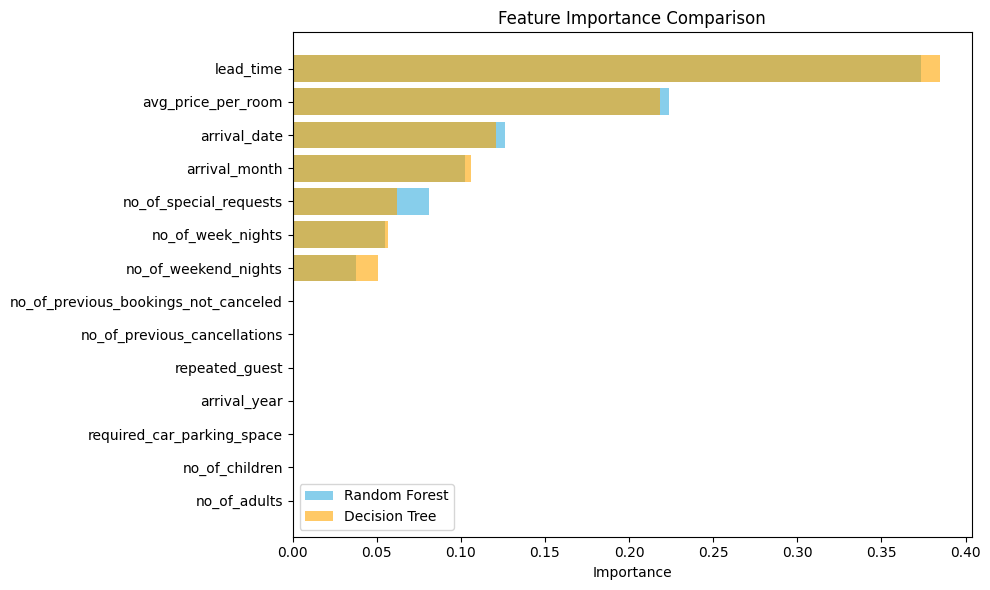

In [ ]:
# Mendapatkan DataFrame fitur penting yang sudah diurutkan
df_feature_importance = df_feature_importance.sort_values(by='Random Forest Importance', ascending=True)

# Plotting bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance['Feature'], df_feature_importance['Random Forest Importance'], color='skyblue', label='Random Forest')
plt.barh(df_feature_importance['Feature'], df_feature_importance['Decision Tree Importance'], color='orange', alpha=0.6, label='Decision Tree')

plt.xlabel('Importance')
plt.title('Feature Importance Comparison')
plt.legend()
plt.tight_layout()
plt.show()

# Data Latih dan Data test dengan perbandingan 70:30

In [ ]:
# Memisahkan data fitur dan target
X=df.drop('Status',axis=1)
y=df['Status']
# Membagi data menjadi data latih dan data uji dengan perbandingan 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
  # Scaling menggunakan StandardScaler
scaler=StandardScaler()
scaler.fit(X_train,y_train)

StandardScaler()

In [ ]:
# Melakukan scaling pada data latih menggunakan scaler yang telah difit sebelumnya
X_train = scaler.transform(X_train)

# Melakukan scaling pada data uji menggunakan scaler yang telah difit sebelumnya
X_test = scaler.transform(X_test)

In [ ]:
# Decision Tree
Hotel_DT=DecisionTreeClassifier()
Hotel_DT.fit(X_train,y_train)

# Random Forest
Hotel_RF=RandomForestClassifier()
Hotel_RF.fit(X_train,y_train)

RandomForestClassifier()

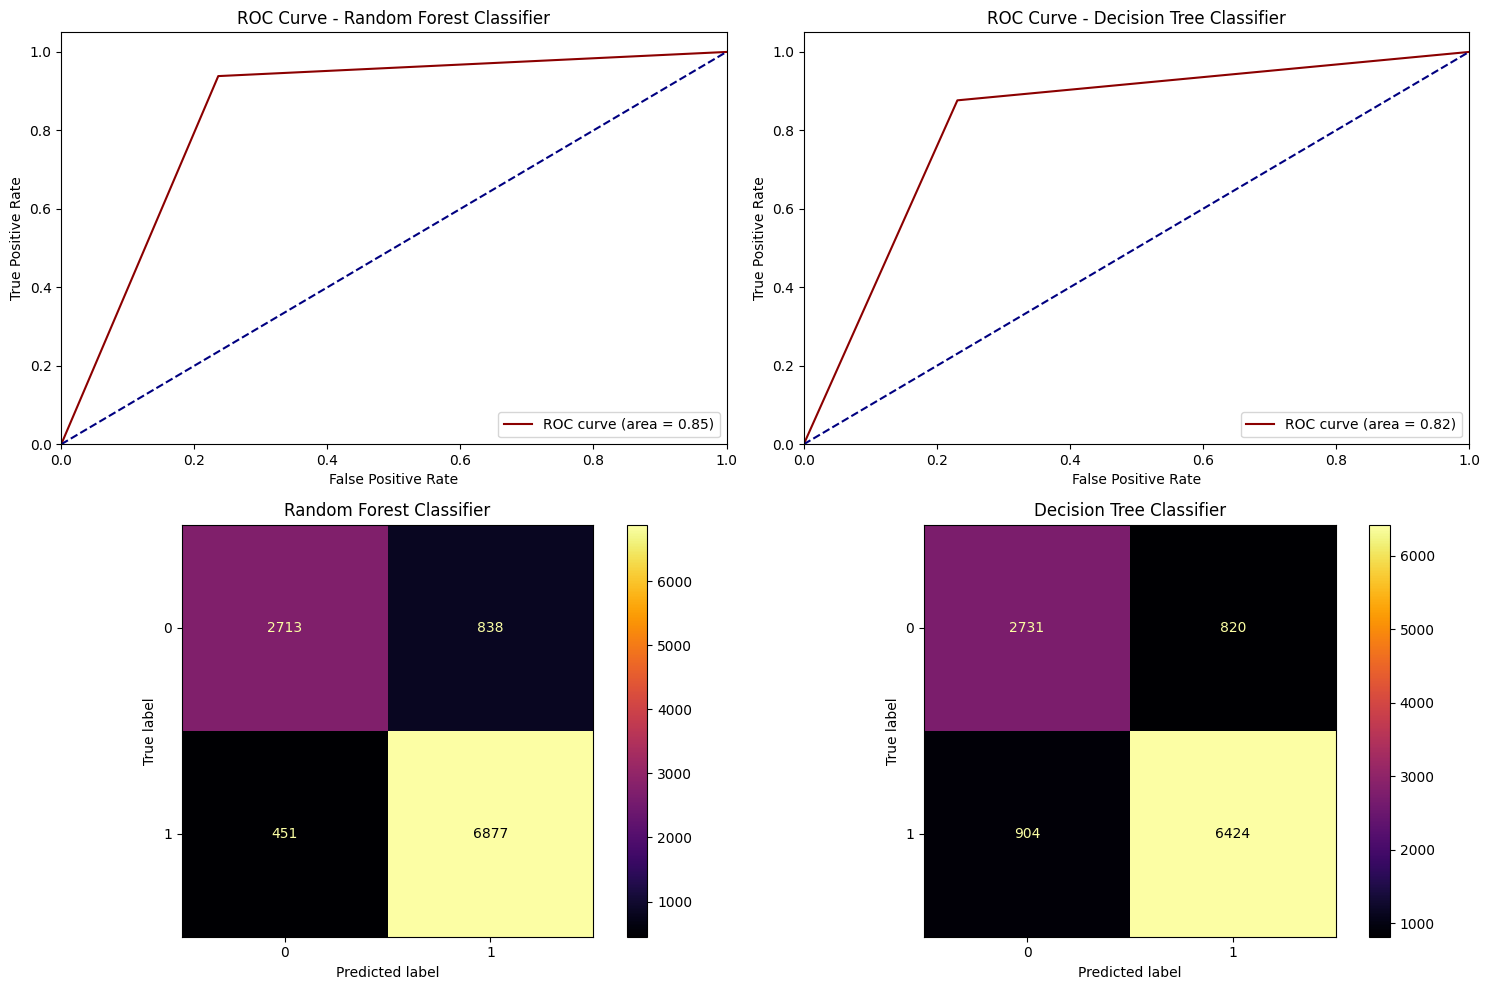

,Accuracy (%),Precision (%),Recall (%),ROC-AUC (%),F1-Score (%)
Model,,,,,
Random Forest Classifier,88.151485,89.138043,93.845524,85.123269,91.431230
Decision Tree Classifier,84.152955,88.680287,87.663755,82.285834,88.169091


In [ ]:
# Melakukan prediksi menggunakan model Random Forest (Hotel_RF) pada data uji (X_test)
y_pred_RF = Hotel_RF.predict(X_test)

# Melakukan prediksi menggunakan model Decision Tree (Hotel_DT) pada data uji (X_test)
y_pred_DT = Hotel_DT.predict(X_test)

# List model dan nama model untuk evaluasi
models = [Hotel_RF, Hotel_DT]
model_names = ['Random Forest Classifier', 'Decision Tree Classifier']

# Inisialisasi list untuk menyimpan hasil evaluasi
acc_scores = []
pre_scores = []
rec_scores = []
roc_scores = []
f1_scores = []

# Buat figure dan axes untuk menampilkan visualisasi
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Loop untuk setiap model
for i, model in enumerate(models):
    # Prediksi target variabel pada data uji
    y_pred = model.predict(X_test)

    # Hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Hitung nilai roc-auc
    roc = roc_auc_score(y_test, y_pred)

    # Hitung false positive rate (fpr) dan true positive rate (tpr) untuk kurva roc
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    # Tampilkan kurva roc
    roc_display = axes[0, i].plot(fpr, tpr, color='darkred', label='ROC curve (area = %0.2f)' % roc)
    roc_display = axes[0, i].plot([0, 1], [0, 1], color='navy', linestyle='--')
    roc_display = axes[0, i].set_xlim([0.0, 1.0])
    roc_display = axes[0, i].set_ylim([0.0, 1.05])
    roc_display = axes[0, i].set_xlabel('False Positive Rate')
    roc_display = axes[0, i].set_ylabel('True Positive Rate')
    roc_display = axes[0, i].set_title('ROC Curve - ' + model_names[i])
    roc_display = axes[0, i].legend(loc="lower right")

    # Tampilkan confusion matrix
    cm_display = ConfusionMatrixDisplay(cm).plot(ax=axes[1, i], cmap='inferno')
    cm_display.ax_.set_title(model_names[i])

    # Hitung true negative, false positive, false negative, true positive
    tn, fp, fn, tp = cm.ravel()

    # Hitung akurasi, precision, recall, dan f1-score
    ac = (tp + tn) / (tp + fp + fn + tn)
    pr = tp / (tp + fp)
    rc = tp / (tp + fn)
    f1 = (2 * pr * rc) / (pr + rc)

    # Simpan hasil evaluasi pada list
    acc_scores.append(ac * 100)
    pre_scores.append(pr * 100)
    rec_scores.append(rc * 100)
    roc_scores.append(roc * 100)
    f1_scores.append(f1 * 100)

# Tampilkan visualisasi
plt.tight_layout()
plt.show()

# Buat dataframe dari hasil evaluasi
df_eval = pd.DataFrame({'Model': model_names,
                        'Accuracy (%)': acc_scores,
                        'Precision (%)': pre_scores,
                        'Recall (%)': rec_scores,
                        'ROC-AUC (%)': roc_scores,
                        'F1-Score (%)': f1_scores})

# Set index dataframe menjadi nama model
df_eval = df_eval.set_index('Model')

# Tampilkan dataframe dengan style untuk highlight nilai tertinggi
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

df_eval_styled = df_eval.style.apply(highlight_max, axis=0)
df_eval_styled

In [ ]:
# Fitur penting dari Random Forest
rf_feature_importances = Hotel_RF.feature_importances_

# Fitur penting dari Decision Tree
dt_feature_importances = Hotel_DT.feature_importances_

# Membuat DataFrame untuk menampilkan fitur penting dari kedua model
df_feature_importance = pd.DataFrame({
    'Feature': X.columns,  # Ganti X_train.columns dengan nama kolom fitur Anda
    'Random Forest Importance': rf_feature_importances,
    'Decision Tree Importance': dt_feature_importances
})

# Mengurutkan DataFrame berdasarkan fitur penting dari Random Forest
df_feature_importance = df_feature_importance.sort_values(by='Random Forest Importance', ascending=False)

# Menampilkan DataFrame fitur penting dengan style untuk highlight nilai tertinggi
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

df_feature_importance_styled = df_feature_importance.style.apply(highlight_max, subset=['Random Forest Importance', 'Decision Tree Importance'])
df_feature_importance_styled


,Feature,Random Forest Importance,Decision Tree Importance
5,lead_time,0.374937,0.373530
12,avg_price_per_room,0.223100,0.217864
8,arrival_date,0.126577,0.125050
7,arrival_month,0.102604,0.106977
13,no_of_special_requests,0.078752,0.060953
3,no_of_week_nights,0.056380,0.062676
2,no_of_weekend_nights,0.037651,0.052950
0,no_of_adults,0.000000,0.000000
1,no_of_children,0.000000,0.000000
4,required_car_parking_space,0.000000,0.000000


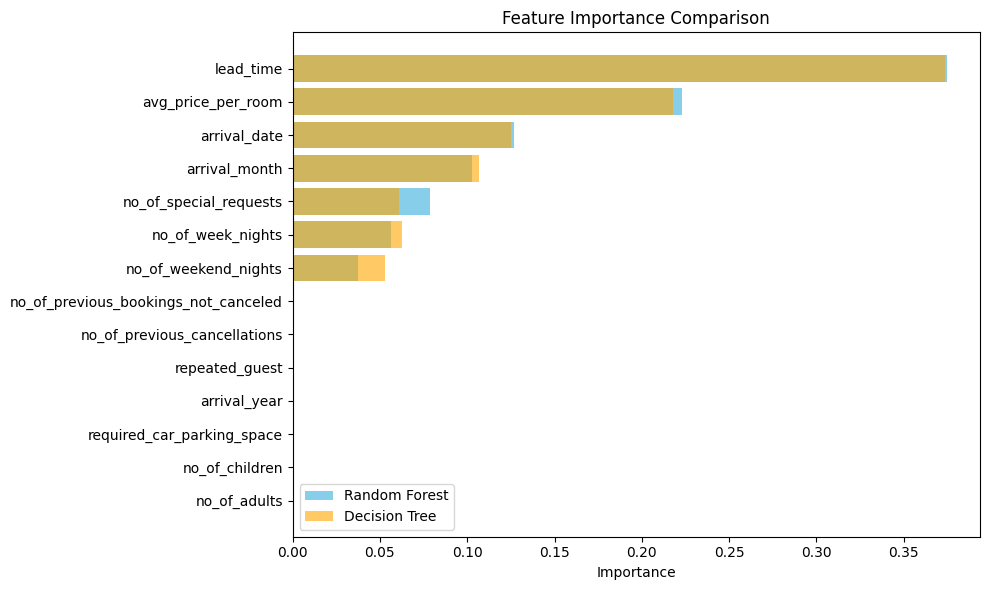

In [ ]:
# Mendapatkan DataFrame fitur penting yang sudah diurutkan
df_feature_importance = df_feature_importance.sort_values(by='Random Forest Importance', ascending=True)

# Plotting bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance['Feature'], df_feature_importance['Random Forest Importance'], color='skyblue', label='Random Forest')
plt.barh(df_feature_importance['Feature'], df_feature_importance['Decision Tree Importance'], color='orange', alpha=0.6, label='Decision Tree')

plt.xlabel('Importance')
plt.title('Feature Importance Comparison')
plt.legend()
plt.tight_layout()
plt.show()

# Data Latih dan Data test dengan perbandingan 60:40

In [ ]:
# Memisahkan data fitur dan target
X=df.drop('Status',axis=1)
y=df['Status']
# Membagi data menjadi data latih dan data uji dengan perbandingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
  # Scaling menggunakan StandardScaler
scaler=StandardScaler()
scaler.fit(X_train,y_train)

StandardScaler()

In [ ]:
# Melakukan scaling pada data latih menggunakan scaler yang telah difit sebelumnya
X_train = scaler.transform(X_train)

# Melakukan scaling pada data uji menggunakan scaler yang telah difit sebelumnya
X_test = scaler.transform(X_test)

In [ ]:
# Decision Tree
Hotel_DT=DecisionTreeClassifier()
Hotel_DT.fit(X_train,y_train)

# Random Forest
Hotel_RF=RandomForestClassifier()
Hotel_RF.fit(X_train,y_train)

RandomForestClassifier()

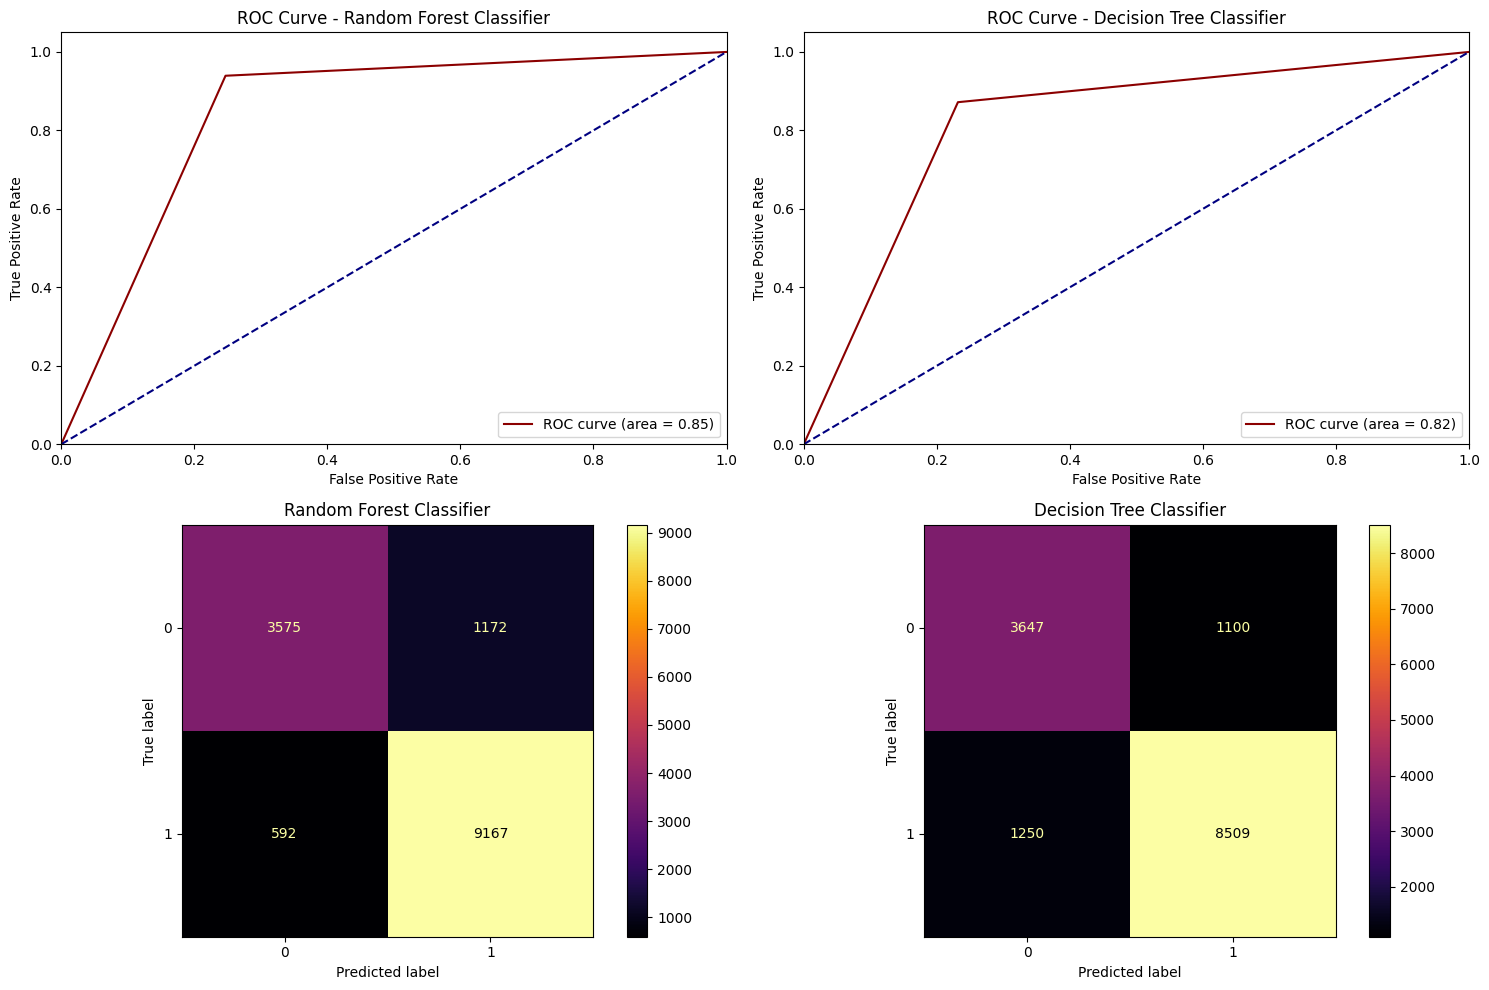

,Accuracy (%),Precision (%),Recall (%),ROC-AUC (%),F1-Score (%)
Model,,,,,
Random Forest Classifier,87.839515,88.664281,93.933805,84.622264,91.223007
Decision Tree Classifier,83.799807,88.552399,87.191311,82.009390,87.866584


In [ ]:
# Melakukan prediksi menggunakan model Random Forest (Hotel_RF) pada data uji (X_test)
y_pred_RF = Hotel_RF.predict(X_test)

# Melakukan prediksi menggunakan model Decision Tree (Hotel_DT) pada data uji (X_test)
y_pred_DT = Hotel_DT.predict(X_test)

# List model dan nama model untuk evaluasi
models = [Hotel_RF, Hotel_DT]
model_names = ['Random Forest Classifier', 'Decision Tree Classifier']

# Inisialisasi list untuk menyimpan hasil evaluasi
acc_scores = []
pre_scores = []
rec_scores = []
roc_scores = []
f1_scores = []

# Buat figure dan axes untuk menampilkan visualisasi
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Loop untuk setiap model
for i, model in enumerate(models):
    # Prediksi target variabel pada data uji
    y_pred = model.predict(X_test)

    # Hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Hitung nilai roc-auc
    roc = roc_auc_score(y_test, y_pred)

    # Hitung false positive rate (fpr) dan true positive rate (tpr) untuk kurva roc
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    # Tampilkan kurva roc
    roc_display = axes[0, i].plot(fpr, tpr, color='darkred', label='ROC curve (area = %0.2f)' % roc)
    roc_display = axes[0, i].plot([0, 1], [0, 1], color='navy', linestyle='--')
    roc_display = axes[0, i].set_xlim([0.0, 1.0])
    roc_display = axes[0, i].set_ylim([0.0, 1.05])
    roc_display = axes[0, i].set_xlabel('False Positive Rate')
    roc_display = axes[0, i].set_ylabel('True Positive Rate')
    roc_display = axes[0, i].set_title('ROC Curve - ' + model_names[i])
    roc_display = axes[0, i].legend(loc="lower right")

    # Tampilkan confusion matrix
    cm_display = ConfusionMatrixDisplay(cm).plot(ax=axes[1, i], cmap='inferno')
    cm_display.ax_.set_title(model_names[i])

    # Hitung true negative, false positive, false negative, true positive
    tn, fp, fn, tp = cm.ravel()

    # Hitung akurasi, precision, recall, dan f1-score
    ac = (tp + tn) / (tp + fp + fn + tn)
    pr = tp / (tp + fp)
    rc = tp / (tp + fn)
    f1 = (2 * pr * rc) / (pr + rc)

    # Simpan hasil evaluasi pada list
    acc_scores.append(ac * 100)
    pre_scores.append(pr * 100)
    rec_scores.append(rc * 100)
    roc_scores.append(roc * 100)
    f1_scores.append(f1 * 100)

# Tampilkan visualisasi
plt.tight_layout()
plt.show()

# Buat dataframe dari hasil evaluasi
df_eval = pd.DataFrame({'Model': model_names,
                        'Accuracy (%)': acc_scores,
                        'Precision (%)': pre_scores,
                        'Recall (%)': rec_scores,
                        'ROC-AUC (%)': roc_scores,
                        'F1-Score (%)': f1_scores})

# Set index dataframe menjadi nama model
df_eval = df_eval.set_index('Model')

# Tampilkan dataframe dengan style untuk highlight nilai tertinggi
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

df_eval_styled = df_eval.style.apply(highlight_max, axis=0)
df_eval_styled

In [ ]:
# Fitur penting dari Random Forest
rf_feature_importances = Hotel_RF.feature_importances_

# Fitur penting dari Decision Tree
dt_feature_importances = Hotel_DT.feature_importances_

# Membuat DataFrame untuk menampilkan fitur penting dari kedua model
df_feature_importance = pd.DataFrame({
    'Feature': X.columns,  # Ganti X_train.columns dengan nama kolom fitur Anda
    'Random Forest Importance': rf_feature_importances,
    'Decision Tree Importance': dt_feature_importances
})

# Mengurutkan DataFrame berdasarkan fitur penting dari Random Forest
df_feature_importance = df_feature_importance.sort_values(by='Random Forest Importance', ascending=False)

# Menampilkan DataFrame fitur penting dengan style untuk highlight nilai tertinggi
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

df_feature_importance_styled = df_feature_importance.style.apply(highlight_max, subset=['Random Forest Importance', 'Decision Tree Importance'])
df_feature_importance_styled


,Feature,Random Forest Importance,Decision Tree Importance
5,lead_time,0.372971,0.377257
12,avg_price_per_room,0.222324,0.220154
8,arrival_date,0.126958,0.123866
7,arrival_month,0.104359,0.108437
13,no_of_special_requests,0.075797,0.060717
3,no_of_week_nights,0.057167,0.062385
2,no_of_weekend_nights,0.040423,0.047184
0,no_of_adults,0.000000,0.000000
1,no_of_children,0.000000,0.000000
4,required_car_parking_space,0.000000,0.000000


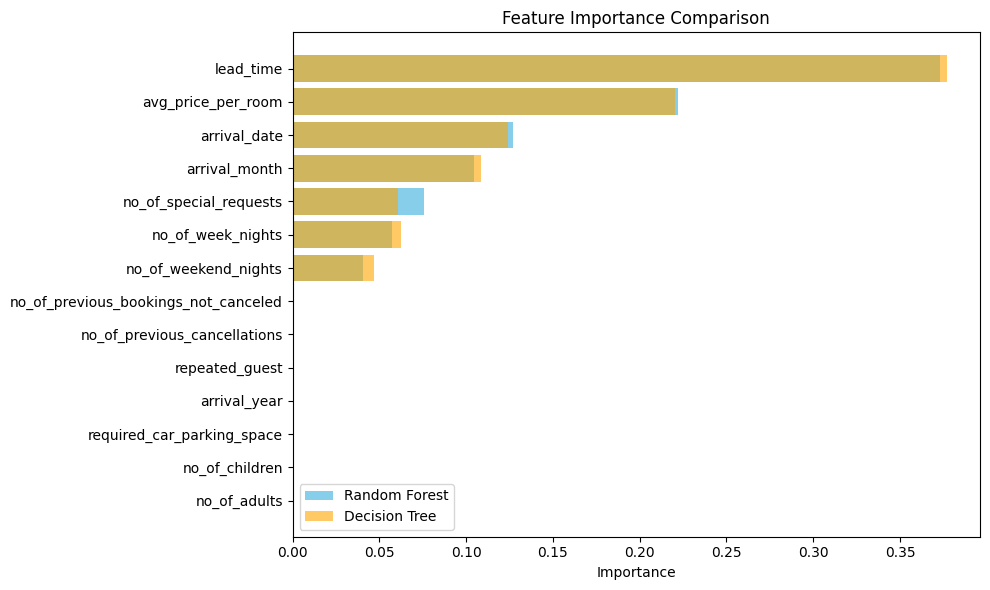

In [ ]:
# Mendapatkan DataFrame fitur penting yang sudah diurutkan
df_feature_importance = df_feature_importance.sort_values(by='Random Forest Importance', ascending=True)

# Plotting bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance['Feature'], df_feature_importance['Random Forest Importance'], color='skyblue', label='Random Forest')
plt.barh(df_feature_importance['Feature'], df_feature_importance['Decision Tree Importance'], color='orange', alpha=0.6, label='Decision Tree')

plt.xlabel('Importance')
plt.title('Feature Importance Comparison')
plt.legend()
plt.tight_layout()
plt.show()

# Kesimpulan Eval

Berdasarkan hasil evaluasi model pada perbandingan data train-test yang berbeda (67:33, 80:20, 70:30, dan 60:40), kita dapat membuat beberapa kesimpulan:

1. **Pembandingan Model**:
   - **Random Forest vs. Decision Tree**:  Pada umumnya, Random Forest Classifier memiliki kinerja yang lebih baik dalam sebagian besar metrik evaluasi dibandingkan dengan Decision Tree Classifier dalam semua rasio pembagian data. Hal ini menunjukkan bahwa penggunaan ensamble seperti Random Forest dapat memberikan hasil yang lebih baik secara konsisten dalam banyak kasus dibandingkan dengan model Decision Tree

2. **Pembagian Data Latih dan Uji**:
   - **Pengaruh Pembagian Data**: Tidak ada perubahan signifikan pada kinerja model antara pembagian data 67:33, 80:20, 70:30, dan 60:40. Perbedaan antara nilai metrik evaluasi pada setiap model cenderung tidak jauh berbeda antara proporsi data latih dan uji yang berbeda.

3. **Forest Classifier**:

  - Model Random Forest Classifier memberikan performa yang baik dalam semua perbandingan data train-test.
  - Akurasi (Accuracy) model berada di kisaran 87.87% - 88.27%, yang menunjukkan kemampuan model untuk mengklasifikasikan data dengan benar.
  - Presisi (Precision) model berada di kisaran 88.71% - 89.39%, yang menunjukkan kemampuan model dalam memberikan hasil positif yang benar.
  Recall model berada di kisaran 93.72% - 93.97%, yang menunjukkan kemampuan model dalam mengidentifikasi secara akurat hasil positif.
  - Area di bawah kurva ROC (ROC-AUC) model berada di kisaran 84.67% - 85.36%, yang menunjukkan kemampuan model dalam membedakan antara kelas positif dan negatif.
  - F1-Score model berada di kisaran 91.24% - 91.50%, yang menggabungkan presisi dan recall untuk memberikan ukuran keseluruhan kinerja model.


4. **Decision Tree Classifier**:

  - Model Decision Tree Classifier juga memberikan performa yang baik dalam semua perbandingan data train-test, meskipun sedikit lebih rendah dibandingkan dengan Random Forest Classifier.
  - Akurasi (Accuracy) model berada di kisaran 83.76% - 84.61%.
  - Presisi (Precision) model berada di kisaran 88.63% - 88.98%.
  - Recall model berada di kisaran 87.02% - 88.42%.
  - Area di bawah kurva ROC (ROC-AUC) model berada di kisaran 82.04% - 82.75%.
  - F1-Score model berada di kisaran 87.82% - 88.59%.

Secara keseluruhan, kedua model (Random Forest Classifier dan Decision Tree Classifier) memberikan performa yang baik dalam mengklasifikasikan data. Namun, Random Forest Classifier cenderung memberikan hasil yang sedikit lebih baik dalam hal akurasi, presisi, recall, ROC-AUC, dan F1-Score dibandingkan dengan Decision Tree Classifier. Oleh karena itu, Random Forest Classifier dapat dianggap sebagai pilihan yang lebih baik dalam kasus ini.